In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

df = pd.read_csv(r'..\Data\processed\Merged_Advanced_Stats_2018_2019.csv')

In [62]:
pos_list = ['RB', 'QB', 'WR', 'TE']

In [63]:
df = df.loc[(df['pos'].isin(pos_list)) & (df['year'] == 2019)]

In [64]:
df['year'].value_counts()

2019    4001
Name: year, dtype: int64

In [65]:
df['pos'].value_counts()

WR    1740
RB    1094
TE     627
QB     540
Name: pos, dtype: int64

In [66]:
df.columns

Index(['player_id', 'player_name', 'pos', 'year', 'Date', 'Week', 'Age', 'Tm',
       'Home/Away', 'Opp', 'Result', 'Passing_Cmp', 'Passing_Att',
       'Passing_Yds', 'Passing_TD', 'Passing_Int', 'Passing_Rate',
       'Passing_Sk', 'Passing_Y/A', 'Passing_AY/A', 'Rushing_Att',
       'Rushing_Yds', 'Rushing_Y/A', 'Rushing_TD', 'Receiving_Tgt',
       'Receiving_Rec', 'Receiving_Yds', 'Receiving_Y/R', 'Receiving_TD',
       'Receiving_Y/Tgt', 'Scoring_2PM', 'Fumbles', 'Fumbles_Lost',
       'Rushing_1D', 'Rushing_YBC', 'Rushing_YAC', 'Rushing_BrkTkl',
       'Receiving_1D', 'Receiving_YBC', 'Receiving_YAC', 'Receiving_BrkTkl',
       'Receiving_Drop', 'Receiving_Drop%', 'Passing_1D', 'Passing_IAY',
       'Passing_CAY', 'Passing_YAC', 'Passing_Drops', 'Passing_BadTh',
       'Passing_Bltz', 'Passing_Hrry', 'Passing_Hits', 'Passing_Scrm',
       'std_scoring', 'ppr_scoring', 'half_ppr_scoring'],
      dtype='object')

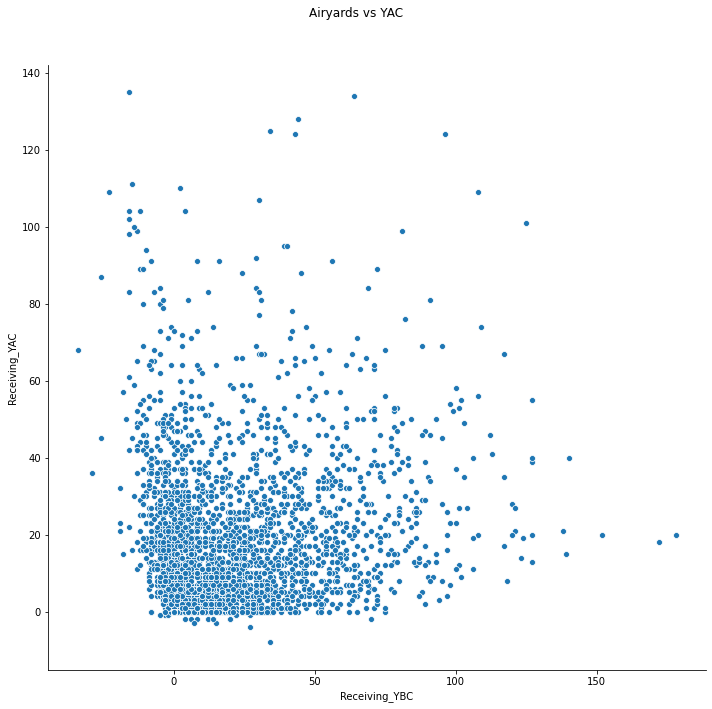

In [67]:
#Scatterplot airyards vs raw_yac

g = sns.relplot(x='Receiving_YBC', y='Receiving_YAC', data=df, height=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Airyards vs YAC');

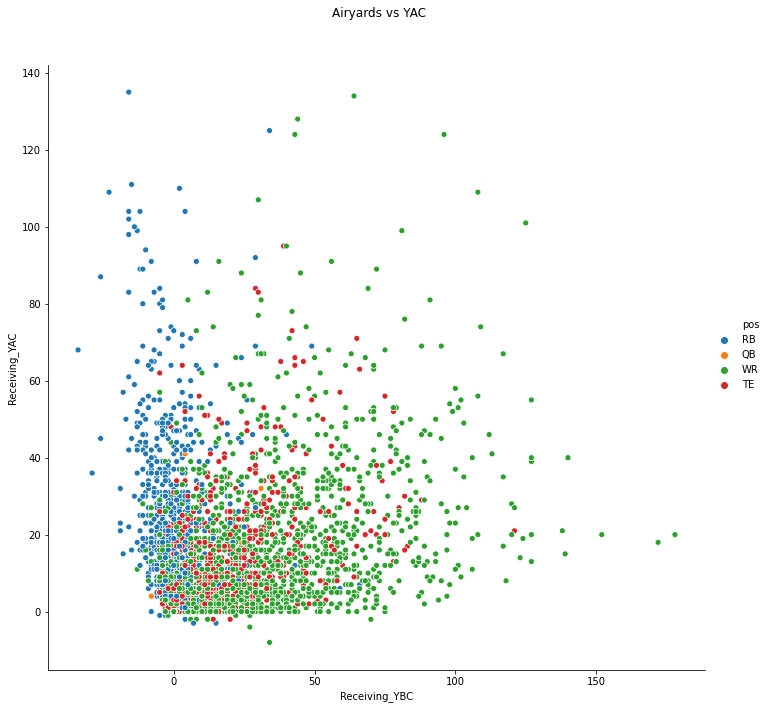

In [68]:
#Scatterplot airyards vs raw_yac by position

g = sns.relplot(x='Receiving_YBC', y='Receiving_YAC', hue='pos', data=df, height=10)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Airyards vs YAC');

In [72]:
top_wr = df.loc[df['pos']=='WR'].sort_values('ppr_scoring', ascending=False).head(25).reset_index()

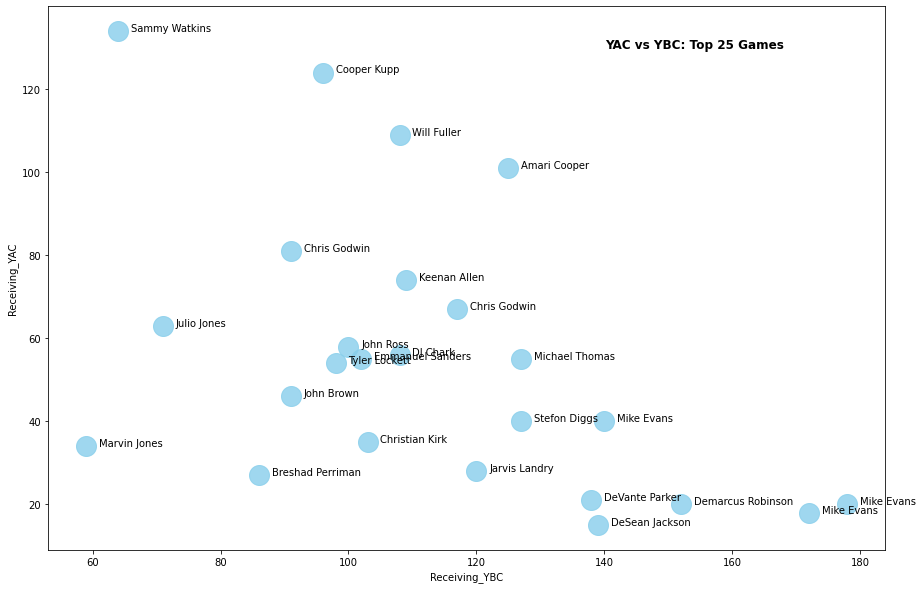

In [98]:
#Scatterplot airyards vs raw_yac by position

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)


g =sns.regplot(data=top_wr, x='Receiving_YBC', y='Receiving_YAC', fit_reg=False, marker='o', color='skyblue', scatter_kws={'s':400})

g.text(140+0.2, 130, "YAC vs YBC: Top 25 Games", horizontalalignment='left', size='large', color='black', weight='semibold')
#sns.plt.show()

for line in range(0,top_wr.shape[0]):
     g.text(top_wr['Receiving_YBC'][line]+2, top_wr['Receiving_YAC'][line], top_wr['player_name'][line], horizontalalignment='left', size='medium', color='black', weight='regular')

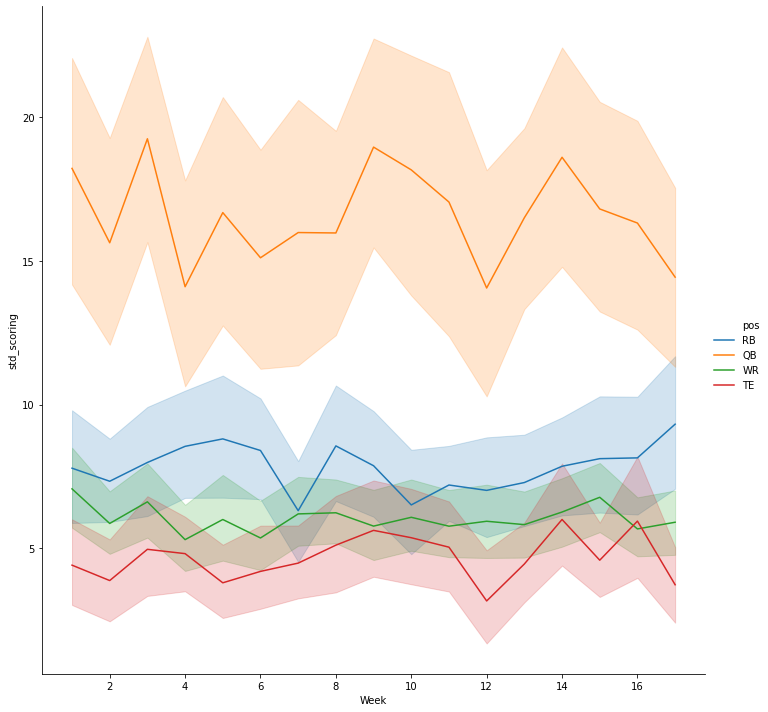

In [17]:
#std scoring line by week
g = sns.relplot(x='Week', y='std_scoring', kind='line', hue='pos', data=df, height=10)

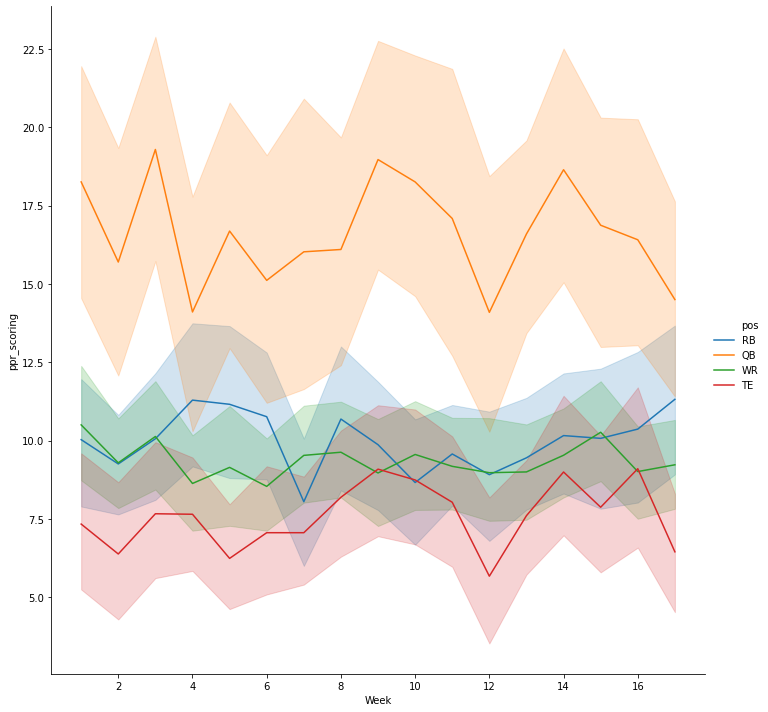

In [18]:
#std scoring line by week
g = sns.relplot(x='Week', y='ppr_scoring', kind='line', hue='pos', data=df, height=10)

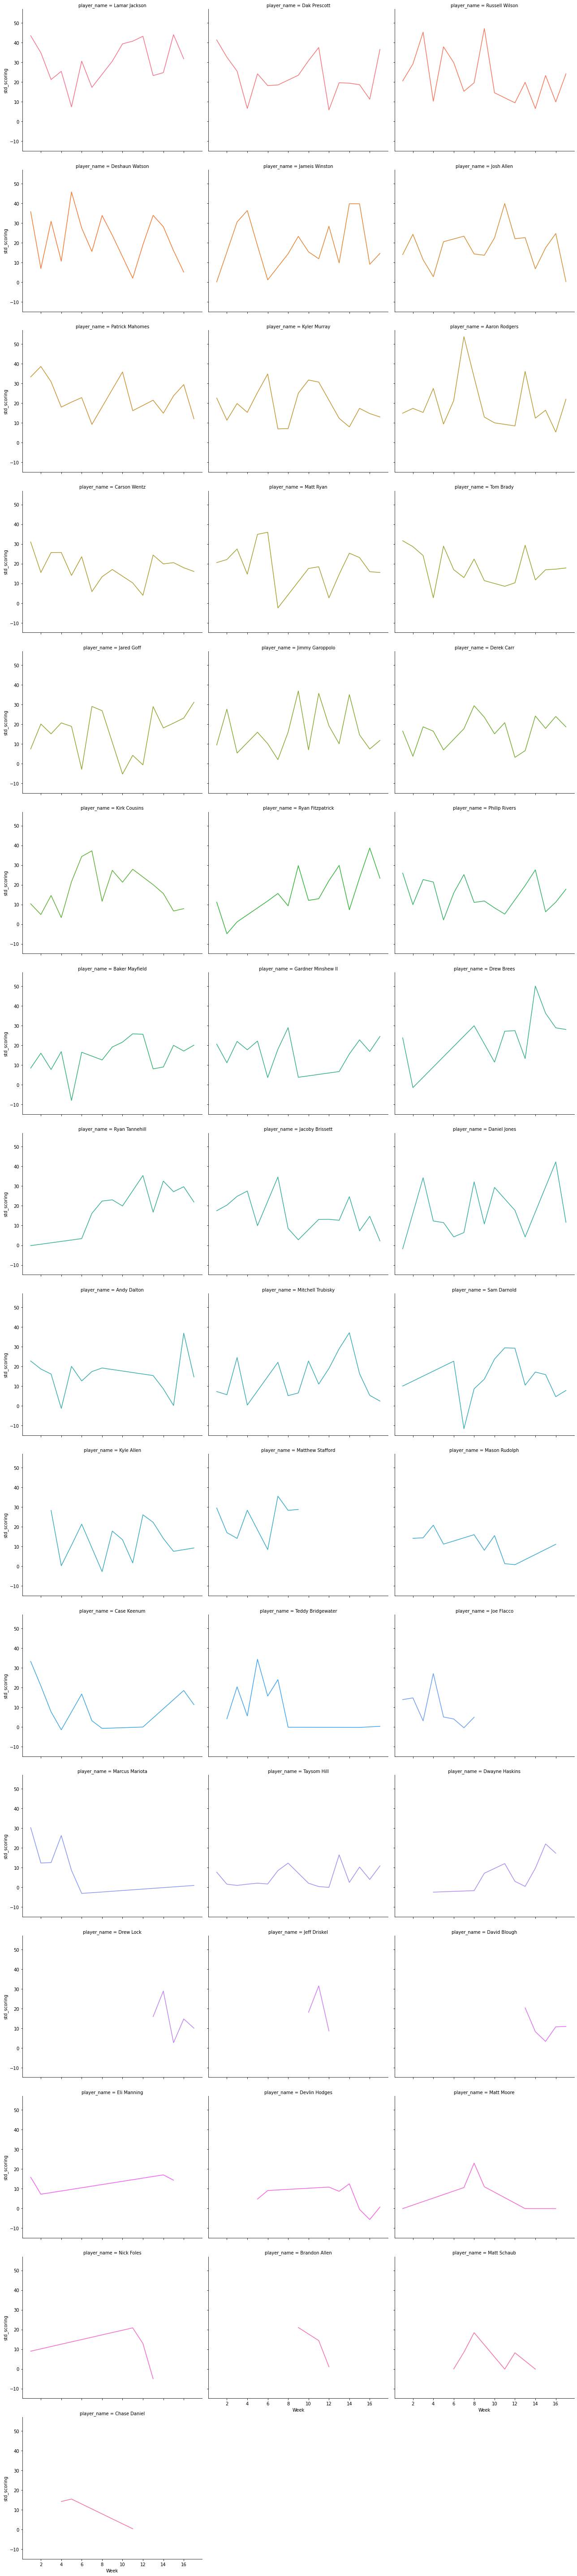

In [25]:
g = sns.relplot(x='Week', y='std_scoring', kind='line', hue='player_name',
col='player_name', height=5, aspect=1.2, col_wrap=3,
legend=False, data=df.loc[df['pos'] =='QB'])